In [58]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Часть 1. О теореме Байеса

### Задача 1.

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

__Ответ__

По формуле Байеса:

$$P\Big(невиновен\ |\ редкая\ группа\ крови\Big) = 
\frac{P\Big(редкая\ группа\ крови\ |\ невиновен\Big) \cdot P\Big(невиновен\Big)}{P\Big(редкая\ группа\ крови\Big)}$$

Прокурор спутал полную вероятность встретить такую группу крови у случайного подсудимого (и назвал на самом деле именно ее - 1%) с апостериорной вероятностью, что подсудимый невиновен, при условии что у него оказалась редкая группа крови, а должен был оценить именно ее.

<hr>

__Задача 2.__

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

__Ответ__

Перепищем еще раз формула Байеса:

$$P\Big(виновен\ |\ редкая\ группа\ крови\Big) = 
\frac{P\Big(редкая\ группа\ крови\ |\ виновен\Big) \cdot P\Big(виновен\Big)}{P\Big(редкая\ группа\ крови\Big)}$$

$$P\Big(виновен\ |\ редкая\ группа\ крови\Big) = \frac{1 \cdot 10^{-6}}{ 10^{-2} } = 10^{-4}$$

На первый взгляд кажется, что адвокат действительно прав.<br>
Но вероятность, которую подсчитал он - это просто вероятость того, что **случайно взятый в городе человек с редкой группой крови** окажется виновен.

Адвокат не берет во внимание то, что этот подсудимый, скорее всего, не случайно взятый человек из целого города, у кого вдруг впоследствии оказалась редкая группа крови.<br>
Возможно, был какой-то круг подозреваемых (что снизило бы априорную вероятность того, что человек виновен с $10^{-6}$ до какого-то меньшего числа), и тогда, вероятность среди меньшего множества подозреваемых признать обвиняемого виновным была много выше, при условии его редкой группы крови.

<hr>

__Задача 3.__

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам - на чём лучше сосредоточиться?

In [96]:
p_ill = 0.01

def test_quality(fp=0.05, fn=0.05):
    """Probability of Patient is really ill when the test was positive"""
    p_full = p_ill * (1 - fn) + (1 - p_ill) * fp
    p_aposterior = p_ill * (1 - fn) / p_full
    return p_aposterior

In [108]:
# initial check:
test_quality(0.05, 0.05)

0.16101694915254236

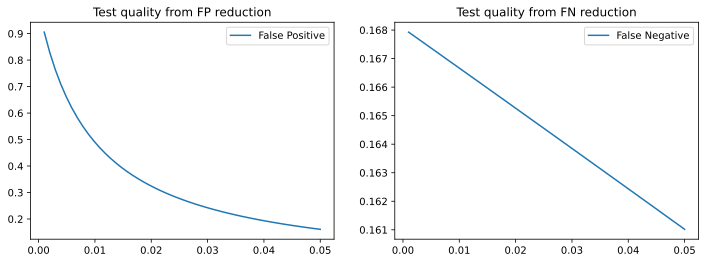

In [119]:
# test quality depends on FP and FN ranges
fn_grid = fp_grid = np.linspace(0.001, 0.05, num=51)


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title("Test quality from FP reduction")
ax[0].plot(fp_grid, [test_quality(fp=i, fn=0.05) for i in fp_grid], label="False Positive")
ax[0].legend()

ax[1].set_title("Test quality from FN reduction")
ax[1].plot(fp_grid, [test_quality(fn=i) for i in fn_grid], label="False Negative")
ax[1].legend();

__Ответ__

Уменьшение ошибки False Positive значительно увеличивает качество теста (кратно), в отличие от уменьшения ошибки False Negative, которое увеличивает кажество теста лишь в сотых долях процента.

Вывод: при одинаковой стоимости уменьшения ошибки -> стоит сосредоточиться на False Positive 

<hr>

## Часть 2. О линейной регрессии

__Задача 1.__

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [30]:
DATASET_PATH = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
LOCATION = "Russia"
START_DATE = "2020-03-20"
TRAIN_PERIOD_DAYS = 50
TARGET_COLS = ["total_cases", "new_cases"]

In [20]:
df = pd.read_csv(
    DATASET_PATH,
    parse_dates=["date"],
    date_parser=lambda x: datetime.datetime.strptime(x, "%Y-%m-%d")
)

In [31]:
df_ru = df[
    (df.location == LOCATION) &\
    (df.date >= START_DATE)
].copy() \
    .sort_values(by="date") \
    .reset_index(drop=True)

In [38]:
# Все нули в new cases на единицы
df_ru["new_cases"] = np.clip(df_ru["new_cases"], a_min=1, a_max=None)

In [83]:
# Разделим на Train и Test
df_train, df_test = train_test_split(df_ru, train_size=TRAIN_PERIOD_DAYS, shuffle=False)

__Задача 2.__

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: ​y ~ exp(линейная функция от x),​где x — номер текущего дня.

b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

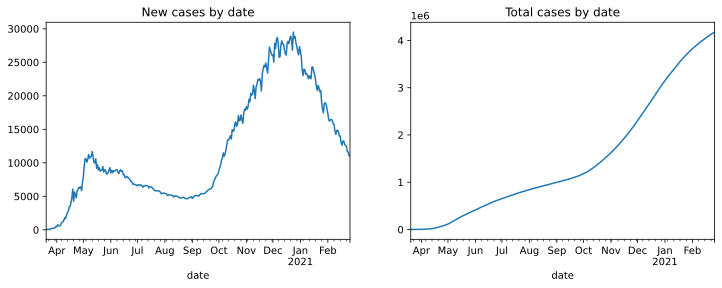

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df_ru.set_index("date")["new_cases"].plot(ax=ax[0], title="New cases by date")
df_ru.set_index("date")["total_cases"].plot(ax=ax[1], title="Total cases by date");

In [57]:
y = df_train["new_cases"]
X = np.arange(1, 51)[:, np.newaxis]

In [77]:
# a. git regression y ~ exp(x)
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X, np.log(y))
y_hat = model_lr.predict(X)

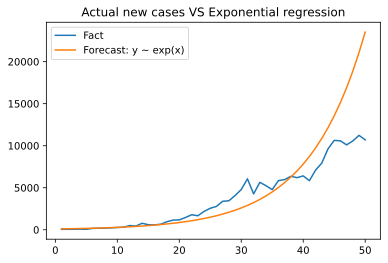

In [80]:
plt.title("Actual new cases VS Exponential regression")
plt.plot(X[:, 0], y, label="Fact")
plt.plot(X[:, 0], np.exp(y_hat), label="Forecast: y ~ exp(x)")
plt.legend();

__Задача 3.__

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана
<img src="./gaussian.png">


Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от *t*

a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

__Задача 4.__

*Бонус:* проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

__Задача 5.__

[*Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете*]

Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?
